Prueba de google colab.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.datasets import make_circles
from IPython.display import clear_output
import time

El propósito es generar una gráfica que pueda hacer el mapeo de cómo se hace la clasificación en un par ordenado de circulos.

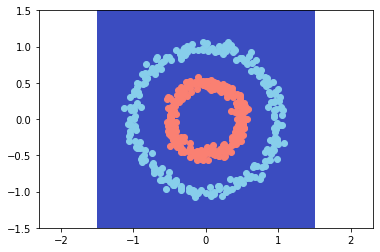

In [ ]:
np.random.seed(100)
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.049)
res = 100

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)
_Y = np.zeros((res,res))

plt.pcolormesh(_x0, _x1, _Y, cmap='coolwarm')
plt.axis('equal')
plt.scatter(X[Y[:] == 0, 0], X[Y[:] == 0, 1], c='skyblue')
plt.scatter(X[Y[:] == 1, 0], X[Y[:] == 1, 1], c='salmon')


La función pcolormesh está llena de ceros los cuales cambiarían de acuerdo a las predicciones de un algoritmo por ejemplo, sin empargo se pueden manipular de manera manual. 

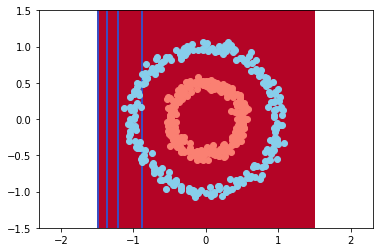

In [ ]:
_y2 = np.ones((res, res))
_y2[:,[0,4,9,20]] = 0.5

plt.pcolormesh(_x0, _x1, _y2, cmap='coolwarm')
plt.axis('equal')
plt.scatter(X[Y[:] == 0, 0], X[Y[:] == 0, 1], c='skyblue')
plt.scatter(X[Y[:] == 1, 0], X[Y[:] == 1, 1], c='salmon')

Una vez descifrado el comando pcolormesh se procede a generar un algoritmo de predicción con la finalidad de que el mapa identifique cómo clasifica los puntos observados y los puntos aledaños generados en el mapa.

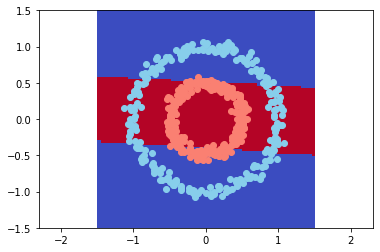

In [ ]:
from sklearn.neural_network import MLPClassifier

red_neuronal = MLPClassifier(hidden_layer_sizes=(4,4), activation='relu', learning_rate_init=0.01,
                             max_iter = 500)

red_neuronal.fit(X,Y)
_y3 = np.zeros((res, res))


def generador(x1,x2, iteracion):
  contador = len(x1)
  resultado = np.zeros((contador, 2))
  resultado[:,1] = x2[iteracion]
  for i in range(contador):
    resultado[i,0] = x1[i]

  return(resultado)  

generador(x1=_x0, x2=_x1, iteracion=99)

for i in range(res):
  _y3[i,:] = red_neuronal.predict(generador(x1=_x0, x2=_x1, iteracion=res-1-i))


plt.pcolormesh(_x0, _x1, _y3, cmap='coolwarm')
plt.axis('equal')
plt.scatter(X[Y[:] == 0, 0], X[Y[:] == 0, 1], c='skyblue')
plt.scatter(X[Y[:] == 1, 0], X[Y[:] == 1, 1], c='salmon')

Como grafico final se hace la actualizacion de la gráfica de acuerdo a las iteraciones de la red

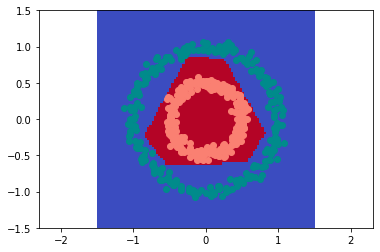

In [ ]:
for k in range(9):
  red_n2 = MLPClassifier(hidden_layer_sizes=(4,4), learning_rate_init=0.01,
                         max_iter = 400 + (20*k))
  
  red_n2.fit(X,Y)

  for i in range(res):
    _y3[i,:] = red_n2.predict(generador(x1=_x0, x2=_x1, iteracion=res-1-i))
    
    
  clear_output(wait=True)
  plt.pcolormesh(_x0, _x1, _y3, cmap='coolwarm')
  plt.axis('equal')
  plt.scatter(X[Y[:] == 0, 0], X[Y[:] == 0, 1], c='darkcyan')
  plt.scatter(X[Y[:] == 1, 0], X[Y[:] == 1, 1], c='salmon')
  plt.show()
  time.sleep(0.5)   

